# Bağımlılıkları İçe Aktarma

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Veri Toplama ve İşleme

In [122]:
# Veri kümesini pandasların DataFrame'ine yükleme
loan_dataset = pd.read_csv('veri.csv')

In [123]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [124]:
# Veri çerçevesinin ilk 5 satırını yazdırma
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
# Satır ve Sütun sayısı
loan_dataset.shape

(614, 13)

In [126]:
# İstatistiksel ölçümler
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [127]:
# Her sütundaki eksik değer sayısı
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Veri Ön İşleme

In [128]:
# Etiket kodlaması
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [129]:
# Veri çerçevesinin ilk 5 satırını yazdırma
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [130]:
# Bağımlı sütun değerleri
loan_dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [131]:
# 3+ değerinin 4 ile değiştirilmesi
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [132]:
# Bağımlı değerler
loan_dataset['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

Veri Görüntüleme

<AxesSubplot:xlabel='Education', ylabel='count'>

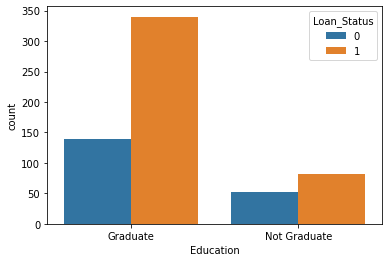

In [133]:
# Eğitim ve Kredi Durumu
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

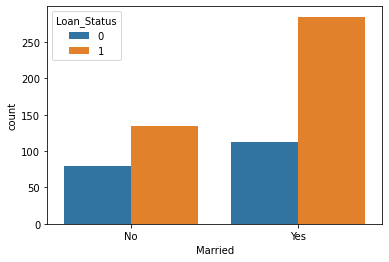

In [134]:
# Medeni Durumu ve Kredi Durumu
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [135]:
# Kategorik sütunları sayısal değerlere dönüştürdük.
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [136]:
# Kişilerin Id sütunu işimize yaramadığından veriden kaldırıyoruz.
loan_dataset.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [137]:
# Her sütundaki eksik değer sayısı
loan_dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
# Eksik değerlerin düşürülmesi ile oluşan veri
Data_Copy=loan_dataset.copy(deep=True)
Data_Copy = Data_Copy.dropna()

In [139]:
# Her sütundaki eksik değer sayısı
Data_Copy.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [143]:
# Mod_Data verisindeki her sütundaki eksik değer sayısı
Mod_Data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [144]:
Data_Copy.duplicated()#tekrarlanan verileri kontrol etmek

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 480, dtype: bool

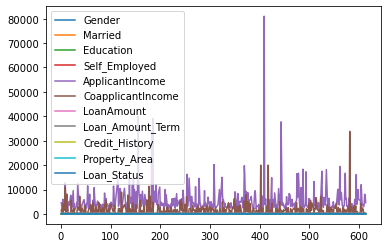

In [145]:
# tüm verileri de çizdirebilriz
Data_Copy.plot()
plt.show()


# Modeli eğitmek:

Destek Vektör Makinesi Modeli

1-) Eğitim ve Test Verisi Ayrımı Data_Copy verisi ile

In [146]:
# Verileri ve Etiketi ayırma
X = Data_Copy.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Data_Copy['Loan_Status'] #bağımsız değişkenler

In [147]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
5       1.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [148]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [149]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [150]:
classifier = svm.SVC(kernel='linear')

In [151]:
#Destek Vektör Makine modelini eğitmek
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Değerlendirmesi

In [152]:
# Eğitim verilerinde doğruluk puanı
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [153]:
print('Eğitim verilerinin doğruluğu : ', training_data_accuray)

Eğitim verilerinin doğruluğu :  0.7986111111111112


<AxesSubplot:>

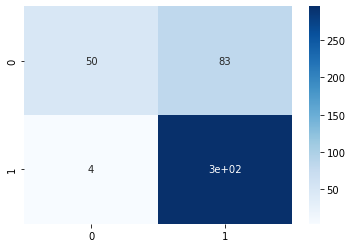

In [154]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [156]:
# Test verilerinde doğruluk puanı
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [157]:
print(' Test verilerinin doğruluk :',test_data_accuray)

 Test verilerinin doğruluk : 0.8333333333333334


<AxesSubplot:>

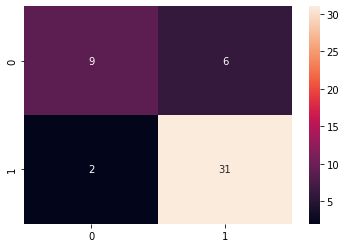

In [158]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

# 2-) Eğitim ve Test Verisi Ayrımı Mod verisi ile

In [159]:
# Verileri ve Etiketi ayırma
X = Mod_Data.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Mod_Data['Loan_Status'] #bağımsız değişkenler

In [160]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [161]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [162]:
classifier = svm.SVC(kernel='linear')
#Destek Vektör Makine modelini eğitmek
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Değerlendirmesi

In [163]:
# Eğitim verilerinde doğruluk puanı
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [164]:
print('Eğitim verilerinin doğruluğu : ', training_data_accuray)

Eğitim verilerinin doğruluğu :  0.802536231884058


<AxesSubplot:>

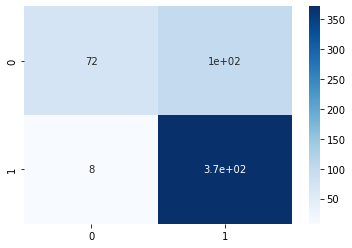

In [165]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [166]:
# Test verilerinde doğruluk puanı
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [167]:
print(' Test verilerinde doğruluğu :',test_data_accuray)

 Test verilerinde doğruluğu : 0.8064516129032258


<AxesSubplot:>

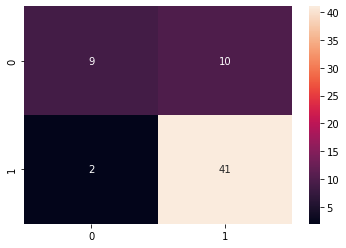

In [168]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

# GELİŞTİRME

# KNN Sınıflandırma

# Eğitim ve Test Verisi Ayrımı DataCopy verisi ile

In [169]:
# Verileri ve Etiketi ayırma
X = Data_Copy.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Data_Copy['Loan_Status'] #bağımsız değişkenler

In [170]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [171]:
#modelin eğitilmesi
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
#modelin testi
Y_tahmin = model.predict(X_test)

In [172]:
# Test verilerinde doğruluk puanı
test_data_accuray = accuracy_score(Y_tahmin,Y_test)

In [173]:
print(' Test verilerinde doğruluğu :',test_data_accuray)

 Test verilerinde doğruluğu : 0.6666666666666666


<AxesSubplot:>

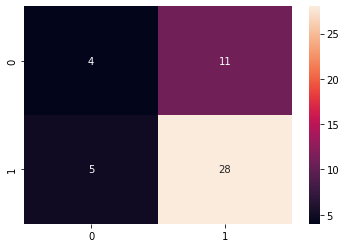

In [174]:
cf_matrix =confusion_matrix(Y_test, Y_tahmin) 
sns.heatmap(cf_matrix, annot=True)

# Eğitim ve Test Verisi Ayrımı Mod verisi ile

In [175]:
# Verileri ve Etiketi ayırma
X = Mod_Data.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Mod_Data['Loan_Status'] #bağımsız değişkenler

In [176]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [177]:
#modelin eğitilmesi
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
#modelin testi
Y_tahmin = model.predict(X_test)

In [178]:
# Test verilerinde doğruluk puanı
test_data_accuray = accuracy_score(Y_tahmin,Y_test)

In [179]:
print(' Test verilerinde doğruluğu :',test_data_accuray)

 Test verilerinde doğruluğu : 0.6451612903225806


<AxesSubplot:>

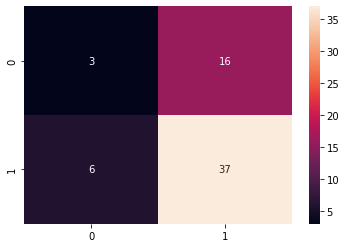

In [180]:
cf_matrix =confusion_matrix(Y_test, Y_tahmin) 
sns.heatmap(cf_matrix, annot=True)

# Rastgele Orman Algoritması

# Eğitim ve Test Verisi Ayrımı DataCopy verisi ile

In [181]:
# Verileri ve Etiketi ayırma
X = Data_Copy.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Data_Copy['Loan_Status'] #bağımsız değişkenler

In [182]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [183]:
modela = RandomForestClassifier()

In [184]:
modela.fit(X_train, Y_train)

RandomForestClassifier()

In [185]:
# Test verilerinde doğruluk puanı
X_test_prediction = modela.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [186]:
print(' Test verilerinin doğruluk :',test_data_accuray)

 Test verilerinin doğruluk : 0.6451612903225806


<AxesSubplot:>

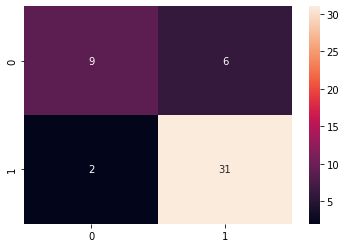

In [187]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

In [188]:
# Eğitim verilerinde doğruluk puanı
X_train_prediction = classifier.predict(X_train)
training_data_accuraya = accuracy_score(X_train_prediction,Y_train)

In [189]:
print('Eğitim verilerinin doğruluğu : ', training_data_accuraya)

Eğitim verilerinin doğruluğu :  0.7986111111111112


<AxesSubplot:>

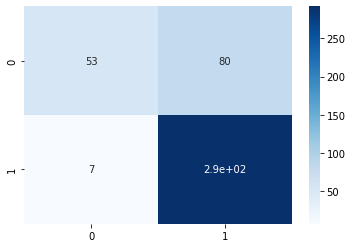

In [190]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

# Eğitim ve Test Verisi Ayrımı Mod verisi ile

In [191]:
# Verileri ve Etiketi ayırma
X = Mod_Data.drop(columns=['Loan_Status'],axis=1)#bağımlı değişkenler
Y = Mod_Data['Loan_Status'] #bağımsız değişkenler

In [192]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [193]:
modela = RandomForestClassifier()

In [194]:
modela.fit(X_train, Y_train)

RandomForestClassifier()

In [195]:
# Test verilerinde doğruluk puanı
X_test_prediction = modela.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [196]:
print(' Test verilerinin doğruluk :',test_data_accuray)

 Test verilerinin doğruluk : 0.6451612903225806


<AxesSubplot:>

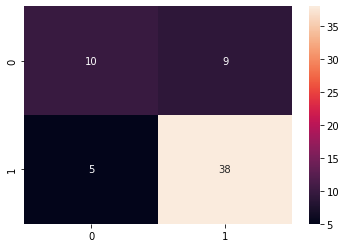

In [197]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

In [198]:
# Eğitim verilerinde doğruluk puanı
X_train_prediction = classifier.predict(X_train)
training_data_accuraya = accuracy_score(X_train_prediction,Y_train)

In [199]:
print('Eğitim verilerinin doğruluğu : ', training_data_accuraya)

Eğitim verilerinin doğruluğu :  0.802536231884058


<AxesSubplot:>

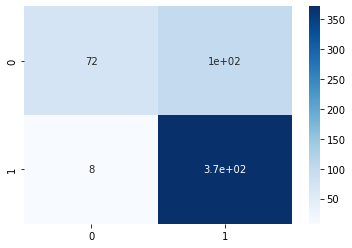

In [200]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')